In [4]:
pip install srai[all]


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: srai[all] in c:\users\oishi banerjee\appdata\local\programs\python\python310\lib\site-packages (0.9.1)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached overpass-0.7.2-py3-none-any.whl (13 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached quackosm-0.12.1-py3-none-any.whl (84 kB)
     -------------------------------------- 55.4/55.4 kB 152.5 kB/s eta 0:00:00
     ---------------------------------------- 7.7/7.7 MB 156.9 kB/s eta 0:00:00
  Using cached pymap3d-3.1.0-py3-none-any.whl (60 kB)
  Using cached mapclassify-2.8.1-py3-none-any.whl (59 kB)
  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
  Using cached folium-0.19.4-py2.py3-none-any.whl (110 kB)
  Using cached scikit_learn-1.6.1-cp310-cp


[notice] A new release of pip available: 22.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from srai.loaders import OSMOnlineLoader
from srai.plotting import plot_regions
from srai.regionalizers import geocode_to_region_gdf

query = {"leisure": "park"}
area = geocode_to_region_gdf("Wrocław, Poland")
loader = OSMOnlineLoader()

parks_gdf = loader.load(area, query)
folium_map = plot_regions(area, colormap=["rgba(0,0,0,0)"], tiles_style="CartoDB positron")
parks_gdf.explore(m=folium_map, color="forestgreen")

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv(r'C:\Users\Oishi Banerjee\OneDrive\Desktop\MP\House_Rent_Dataset.csv')
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [6]:
data.shape

(4746, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [9]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [ ]:
data['Rent'] = pd.to_numeric(data['Rent'], errors='coerce')

data = data.dropna(subset=['Rent'])

s = data.groupby('City')['Rent'].mean().sort_values(ascending=False)

print(s)


City
Mumbai       85321.204733
Delhi        29461.983471
Bangalore    24966.365688
Chennai      21614.092031
Hyderabad    20555.048387
Kolkata      11645.173664
Name: Rent, dtype: float64


C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\1051500571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City',y='Rent',data = data, palette='viridis')


<Axes: xlabel='City', ylabel='Rent'>

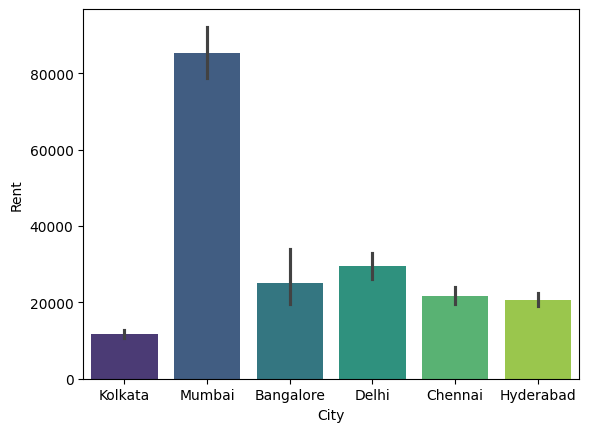

In [19]:
sns.barplot(x='City',y='Rent',data = data, palette='viridis')

In [23]:
data['Rent'] = pd.to_numeric(data['Rent'], errors='coerce')

data = data.dropna(subset=['Rent'])

s = data.groupby('City')['Rent'].mean().sort_values(ascending=False)

print(s)


City
Mumbai       85321.204733
Delhi        29461.983471
Bangalore    24966.365688
Chennai      21614.092031
Hyderabad    20555.048387
Kolkata      11645.173664
Name: Rent, dtype: float64


In [24]:
data['Rent'] = pd.to_numeric(data['Rent'], errors='coerce')

data = data.dropna(subset=['Rent'])

m = data.groupby(['City', 'BHK']).agg({'Rent': ['min', 'max', 'mean']})

print(m)

                 Rent                        
                  min      max           mean
City      BHK                                
Bangalore 1      3500    70000    9368.333333
          2      5000    90000   16122.041763
          3     12000  3500000   61988.580247
          4     14000   380000  113043.478261
Chennai   1      3000    21000    8455.926380
          2      5000   600000   15701.692149
          3      7000   330000   35741.913636
          4     20000   250000   96350.000000
          5     50000   100000   75000.000000
          6     60000   280000  170000.000000
Delhi     1      3500    35000   11332.500000
          2      2000   150000   18878.342520
          3      8000   350000   44141.558442
          4     15000   530000  117455.583333
          5    190000   190000  190000.000000
Hyderabad 1      3000   200000    9753.793103
          2      5000   130000   13877.652466
          3      1200   130000   29337.650206
          4     10000   400000   9

In [25]:
l = data[data['City']=='Bangalore']
print(l)

       Posted On  BHK   Rent  Size             Floor    Area Type  \
1496  2022-06-30    3  70000  3354  Ground out of 16  Carpet Area   
1497  2022-06-23    2  10500   800        3 out of 4   Super Area   
1498  2022-07-04    2  13000  1000   Ground out of 4   Super Area   
1499  2022-06-04    2  17000  1040        4 out of 4   Super Area   
1500  2022-06-04    3  21000  1403        1 out of 4   Super Area   
...          ...  ...    ...   ...               ...          ...   
2377  2022-05-23    1   8000   500        2 out of 2   Super Area   
2378  2022-05-23    2  11000  1200   Ground out of 2   Super Area   
2379  2022-06-08    1   8000   750        1 out of 3   Super Area   
2380  2022-06-29    1  13000   700        1 out of 5   Super Area   
2381  2022-06-20    2  30000  1000      12 out of 23  Carpet Area   

                             Area Locality       City Furnishing Status  \
1496                        Talagatta Pura  Bangalore         Furnished   
1497  Nagappa Reddy l

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2052095732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Bangalore'], palette='viridis')


<Axes: xlabel='BHK', ylabel='Rent'>

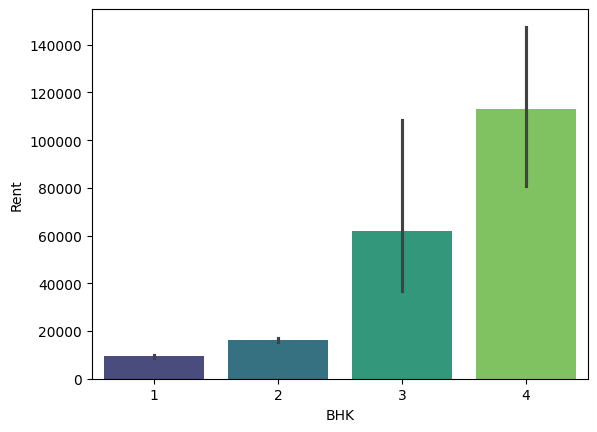

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Bangalore'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2184264029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Delhi'], palette='viridis')


<Axes: xlabel='BHK', ylabel='Rent'>

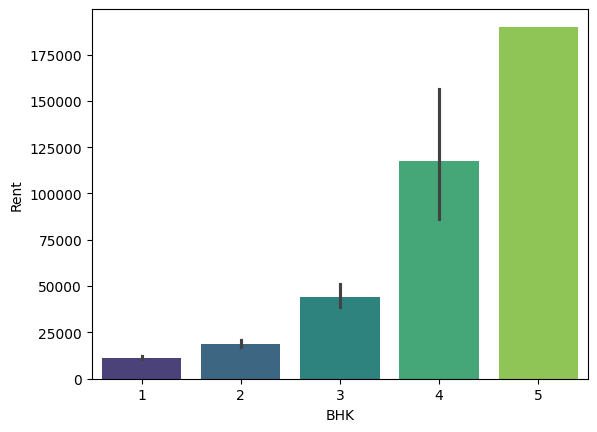

In [28]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Delhi'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2763739186.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Mumbai'], palette='viridis')


<Axes: xlabel='BHK', ylabel='Rent'>

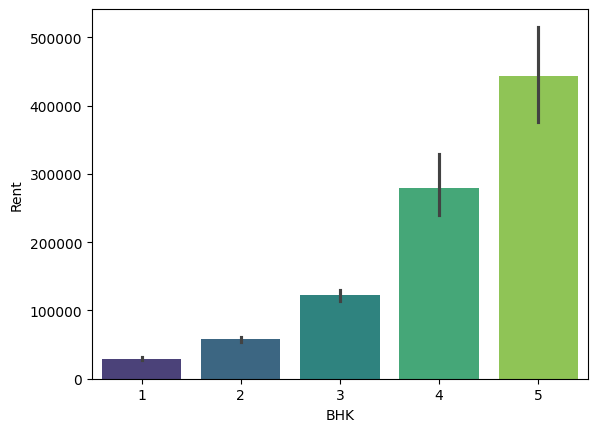

In [29]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Mumbai'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\135343158.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Kolkata'], palette='viridis')


<Axes: xlabel='BHK', ylabel='Rent'>

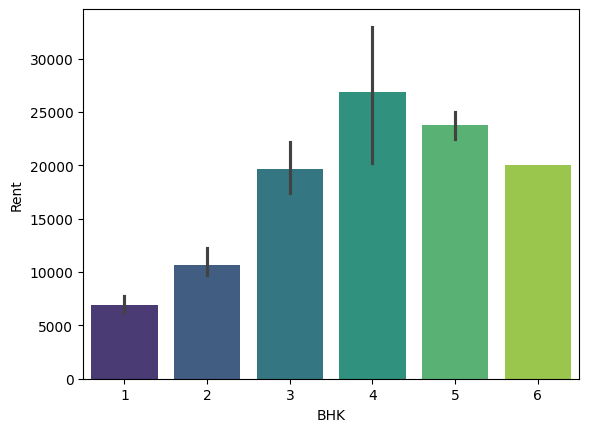

In [30]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Kolkata'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\3030952183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Chennai'], palette='viridis')


<Axes: xlabel='BHK', ylabel='Rent'>

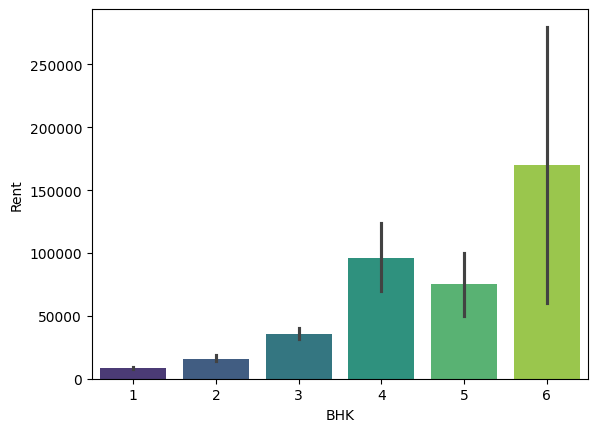

In [31]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Chennai'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2843665257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Hyderabad'], palette='viridis')


<Axes: xlabel='BHK', ylabel='Rent'>

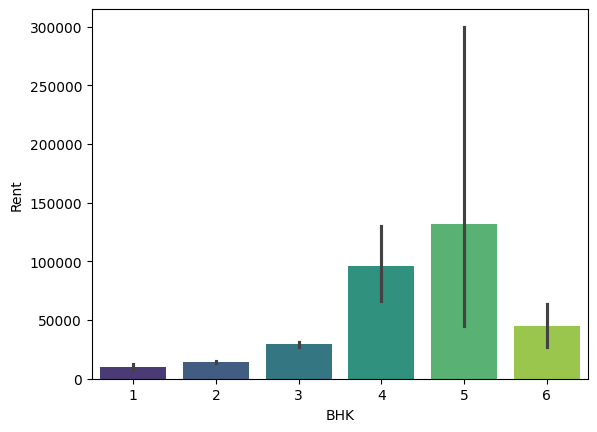

In [32]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Hyderabad'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2975287805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Mumbai'], palette='viridis')


<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

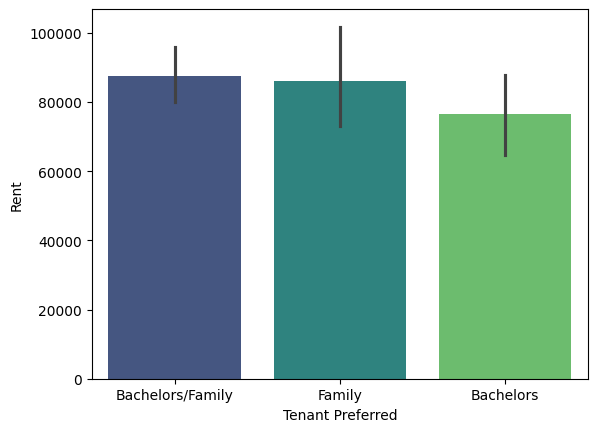

In [35]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Mumbai'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2703914886.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Delhi'], palette='viridis')


<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

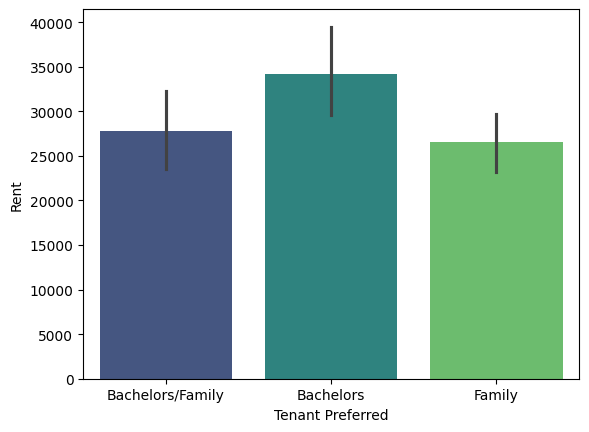

In [36]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Delhi'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\2354062261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Kolkata'], palette='viridis')


<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

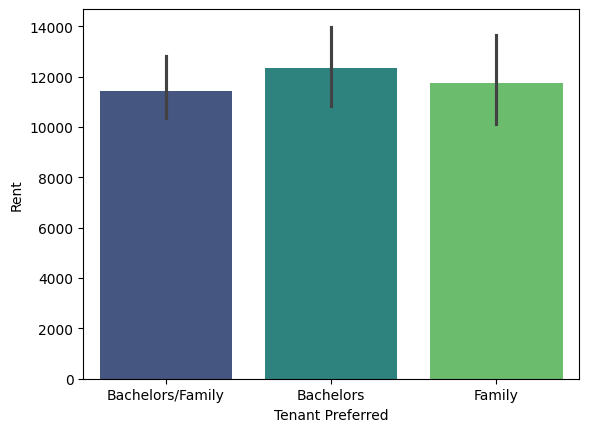

In [37]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Kolkata'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\862103080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Bangalore'], palette='viridis')


<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

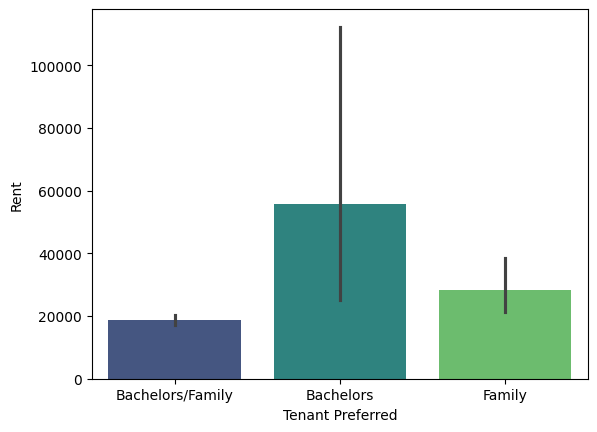

In [38]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Bangalore'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\3514278425.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Chennai'], palette='viridis')


<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

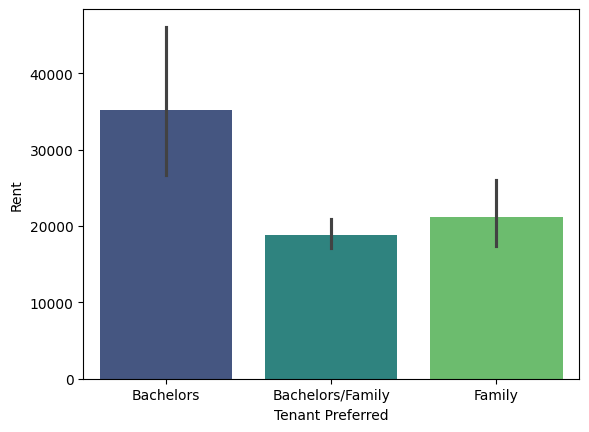

In [39]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Chennai'], palette='viridis')

C:\Users\Oishi Banerjee\AppData\Local\Temp\ipykernel_17004\3891380191.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Hyderabad'], palette='viridis')


<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

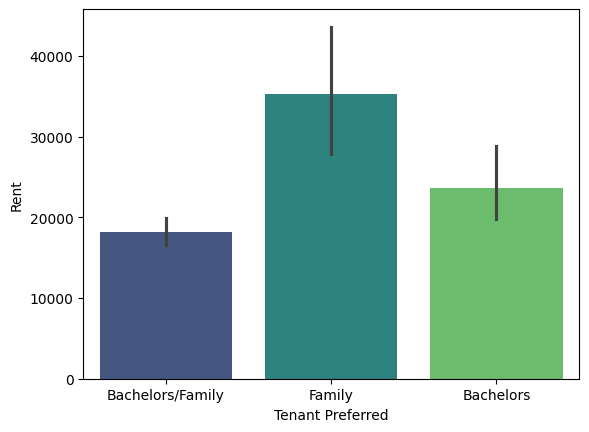

In [40]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Hyderabad'], palette='viridis')

In [ ]:
data['Rent'] = pd.to_numeric(data['Rent'], errors='coerce')

data = data.dropna(subset=['Rent'])

m = data.groupby(['City','Area Locality','Floor','BHK']).agg({'Rent': ['min', 'max', 'mean']})

print(m)

                                                                              Rent  \
                                                                               min   
City      Area Locality                                 Floor           BHK          
Bangalore A Narayanapura, Mahadevapura                  5 out of 5      1    15000   
                                                        Ground out of 3 2    14000   
          Aarna Enclave                                 4 out of 5      2    90000   
          Abbiareddy Layout, Kaggadasapura              1 out of 4      2    22500   
          Abbigere                                      1 out of 2      1     6000   
...                                                                            ...   
Mumbai    simla house at nepeasea road, Napean Sea Road 3 out of 6      1    45000   
          spring grove uno, Lokhandwala Twp             5 out of 7      1    18000   
          sra                                         

In [44]:
m = data.groupby(['City','Area Locality']).agg({'Rent': ['min', 'max', 'mean']})

print(m)

                                                          Rent         \
                                                           min    max   
City      Area Locality                                                 
Bangalore A Narayanapura, Mahadevapura                   14000  15000   
          Aarna Enclave                                  90000  90000   
          Abbiareddy Layout, Kaggadasapura               22500  22500   
          Abbigere                                        6000  12000   
          Aditya Nagar-Vidyaranyapura, Vidyaranyapura    10000  10000   
...                                                        ...    ...   
Mumbai    simla house at nepeasea road, Napean Sea Road  45000  45000   
          spring grove uno, Lokhandwala Twp              18000  18000   
          sra                                            15000  15000   
          sunanda circal                                  7500   7500   
          vanamali chs ghatla, Ghatla              

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data['Rent'] = mms.fit_transform(data[['Rent']])
data['Size'] = mms.fit_transform(data[['Size']])
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,0.002515,0.136421,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,0.005373,0.098874,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,0.004516,0.123905,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,0.002515,0.098874,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,0.001801,0.105131,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [46]:
data['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

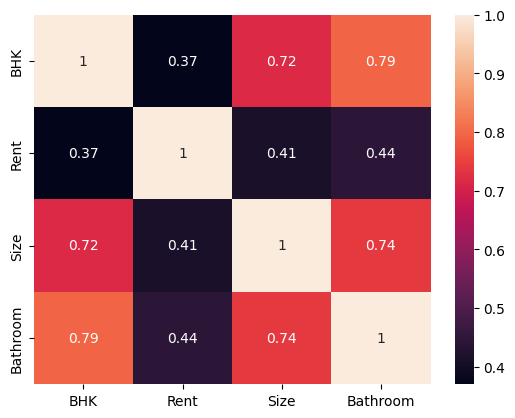

In [48]:
numeric_data = data.select_dtypes(include='number')
cor = numeric_data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [49]:
data.drop(['BHK','Size'],axis=1,inplace=True)

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Area Type'] = le.fit_transform(data[['Area Type']])
data['Furnishing Status'] = le.fit_transform(data[['Furnishing Status']])
data.head(25)

c:\Users\Oishi Banerjee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Oishi Banerjee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Posted On,Rent,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,0.002515,Ground out of 2,2,Bandel,Kolkata,2,Bachelors/Family,2,Contact Owner
1,2022-05-13,0.005373,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1,Contact Owner
2,2022-05-16,0.004516,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1,Contact Owner
3,2022-07-04,0.002515,1 out of 2,2,Dumdum Park,Kolkata,2,Bachelors/Family,1,Contact Owner
4,2022-05-09,0.001801,1 out of 2,1,South Dum Dum,Kolkata,2,Bachelors,1,Contact Owner
5,2022-04-29,0.001658,Ground out of 1,2,Thakurpukur,Kolkata,2,Bachelors/Family,2,Contact Owner
6,2022-06-21,0.002515,Ground out of 4,2,Malancha,Kolkata,2,Bachelors,2,Contact Agent
7,2022-06-21,0.001086,1 out of 2,2,Malancha,Kolkata,2,Bachelors,1,Contact Agent
8,2022-06-07,0.007088,1 out of 2,1,"Palm Avenue Kolkata, Ballygunge",Kolkata,2,Bachelors,2,Contact Agent
9,2022-06-20,0.002515,1 out of 3,1,Natunhat,Kolkata,1,Bachelors/Family,2,Contact Owner


In [51]:
data1 = pd.get_dummies(data['Floor'],drop_first=True)
data2 = pd.get_dummies(data['Area Locality'],drop_first=True)
data3 = pd.get_dummies(data['City'],drop_first=True)
data4 = pd.get_dummies(data['Tenant Preferred'],drop_first=True)
data5 = pd.get_dummies(data['Point of Contact'],drop_first=True)

In [52]:
data.drop(['Floor','Area Locality','City','Tenant Preferred','Point of Contact','Posted On'],axis=1,inplace=True)

In [53]:
data = pd.concat([data,data1,data2,data3,data4,data5],axis=1)
data.head()

,Rent,Area Type,Furnishing Status,Bathroom,1 out of 1,1 out of 10,1 out of 11,1 out of 12,1 out of 13,1 out of 14,...,whitefield,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family,Contact Builder,Contact Owner
0,0.002515,2,2,2,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,0.005373,2,1,1,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,0.004516,2,1,1,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,0.002515,2,2,1,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,0.001801,1,2,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [54]:
x = data.drop('Rent',axis=1)
y = data.iloc[:,1]

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
x = pca.fit_transform(x)